

# <center> Star Type detection using Machine Learning - Project


![](https://cdn.mos.cms.futurecdn.net/VUoa6w8FTLjP4BJGJ9HSg8-970-80.jpg)
    


    
    
## Dataset & Aim
    
The objective of this project is to classify stars based on different features like it's color, luminosity etc.
    
*Firstly, add this [dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset) to kernel. It consists of some different features of stars based on which we need to classify the star types. Information on the target classes is given below,*
- 0 $\rightarrow$ Brown Dwarf
- 1 $\rightarrow$ Red Dwarf
- 2 $\rightarrow$ White Dwarf
- 3 $\rightarrow$ Main Sequence
- 4 $\rightarrow$ Supergiants
- 5 $\rightarrow$ Hypergiants


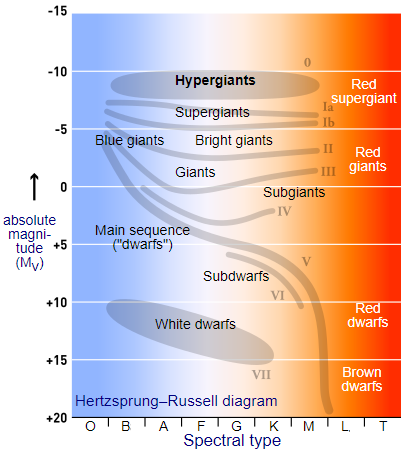

Stellar Evolution

> Categories in the HR diagram can signify Stellar evolution. The long band that goes from the upper left to the lower right is called the main sequence band.

> Sequence band is where stars spend the majority of their life. They are stable in terms of the pressure from fusion, and gravity pulling everything to the center. So they are balanced stars.

> Over time a star's position on this diagram will change. They begin as main sequence stars, they evolve into giants or supergiants, and then eventually they fizzle away into white dwarfs.

> As a star gets older depending upon its mass, it will evolve differently throughout its life.


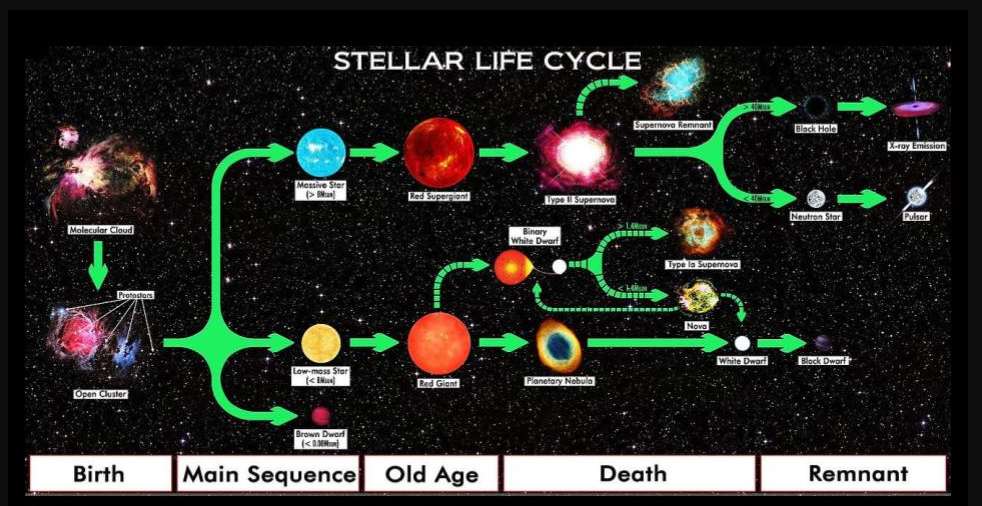


### Import Required libraries
Note: It would probably not be the first step to import required libraries because you don't even know what libraries you will need in your project. But it's completely okay to import the libraries only when you need it later in the code.

In [1]:
# Import os, numpy, pyplot, pandas, seaborn, sklearn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn


In [ ]:
## Suppress Filter Warnings
import warnings
warnings.filterwarnings('ignore')

    
## Creating the data frame
- *Let's read the csv file from the added dataset and create our dataframe.*

In [ ]:
# Mount drive


In [2]:
## Create the data frame
dataset_path = '/content/6 class csv.csv'
star_df = pd.read_csv(dataset_path)

In [4]:
# Show the random sample of 10 rows of star_df data frame
star_df.head(8)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M


In [ ]:
# Fetch general information about the dataset


### Observations
1) Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
2) Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*




Check Pt 1

## Details on object data type columns

- *Let's begin with the Star color column*

In [5]:
## Check the unique values and its counts in Star color column

star_df['Star color'].value_counts()

,count
Star color,
Red,112
Blue,55
Blue-white,26
Blue White,10
yellow-white,8
White,7
Blue white,3
Yellowish White,3
white,3


- Some colors are just repeated in different ways so it needs some cleaning
- Red, Blue, Blue - White, Yellow - White and White are the most observed colors


In [6]:
## Simplest way of doing it manually
star_df.replace({"Star color" : {"Blue-white" : "Blue-White",
                                  "Blue White" : "Blue-White",
                                  "Blue white" : "Blue-White",
                                  "Blue white " : "Blue-White",
                                  "Blue-White" : "Blue-White",
                                  "yellow-white" : "Yellow-White",
                                  "Yellowish White" : "Yellow-White",
                                  "yellowish" : "Yellow-White",
                                  "White-Yellow" : "Yellow-White",
                                  "Yellowish" : "Yellow-White",
                                  "white" : "White",
                                  "Whitish" : "White",
                                  "Blue " : "Blue",
                                  "Pale yellow orange" : "Red",
                                  "Orange" : "Red",
                                  "Orange-Red" : "Red"}},
                                  inplace = True)
print(f"Color           Count\n-----------------------------\n{star_df['Star color'].value_counts()}")

Color           Count
-----------------------------
Star color
Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: count, dtype: int64


- *We are done! All the repeated/similar type of colors have been merged together.*

Now let's move on to 'Spectral Class' and hope that no more data cleaning is required!

In [7]:
# Check the unique values and its count in the Spectral Class column
star_df['Spectral Class'].value_counts()

,count
Spectral Class,
M,111
B,46
O,40
A,19
F,17
K,6
G,1


## Check if data is balanced

- *Balanced data means all the targets have same count*
- *More similar the count of targets, more balanced is the data*

<Axes: xlabel='Star type', ylabel='count'>

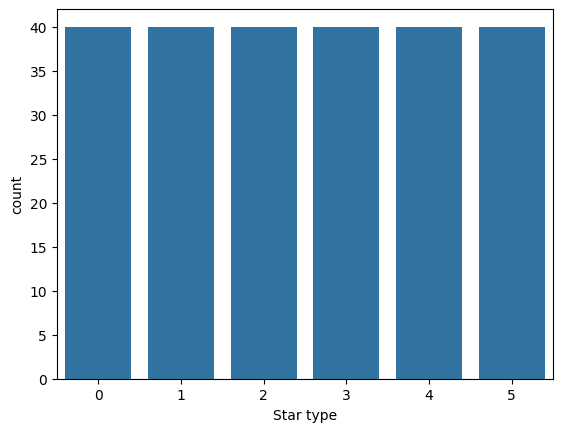

In [13]:
# Barplot
sns.barplot(x = star_df['Star type'].value_counts().index,
              y = star_df['Star type'].value_counts())

<ipython-input-16-4a01baf4a4c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=star_df['Star type'], palette= 'magma')


<Axes: xlabel='Star type', ylabel='count'>

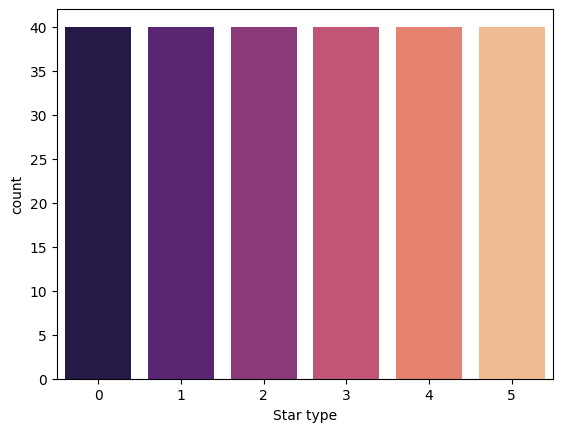

In [16]:
# Countplot

sns.countplot(x=star_df['Star type'], palette= 'magma')


- *We have a very balanced data!*

### Get the X (independent input cols) and y (dependent target col) data

In [19]:
## Features --> Temp, Lum, Rad, Abs Mag
X = star_df.drop(['Star color', 'Spectral Class','Star type'], axis = 1)

So, I think now you got some pretty good idea of what we are doing and how we are doing.

A machine learning model typically requires two things, data that will be fed into the model and lables that we want as the output.
So, in our case, we want to feed X into the model, and we want it to predict the star type, y.

Above we prepared X, to feed into the model, and we have have understood what we want from our model.


In [20]:
# Check your X
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


## As you can see, we have four independent features and based on them we will train our model to predict the type of star.

### Now let's prepare y, our expected output from the model.

In [21]:
## Target --> Star type col
y = star_df['Star type']
y

,Star type
0,0
1,0
2,0
3,0
4,0
...,...
235,5
236,5
237,5
238,5


### What our labels signify?
- 0 $\rightarrow$ Brown Dwarf
- 1 $\rightarrow$ Red Dwarf
- 2 $\rightarrow$ White Dwarf
- 3 $\rightarrow$ Main Sequence
- 4 $\rightarrow$ Supergiants
- 5 $\rightarrow$ Hypergiants

## Let's segregate the data into training and test

#### it's a good pratice to divide your data into two sets, training set on which your model will be trained
#### and testing set, on which your model will be tested

In [23]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

## Perform the train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,  shuffle =True, random_state=42)

In [25]:
# Get the shapes of X_train, X_test, y_train, y_test
print('Shapes for inputs:-')
print( X_train.shape)
print( y_train.shape)

Shapes for inputs:-
(192, 4)
(192,)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # This will convert all inputs to normal disribution
# ohter scalers MinMax scaler, Robust Scaler
from sklearn.linear_model import LogisticRegression

# Create pipeline with scaler and logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state = 42))
])

In [27]:
# Fit the pipeline --> Preprocessing + Training
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [32]:
# Predict on Test data --> Preprocessing + Prediction
y_pred = pipeline.predict(X_val)

In [29]:
X_val.iloc[0]

,24
Temperature (K),16500.000
Luminosity(L/Lo),0.013
Radius(R/Ro),0.014
Absolute magnitude(Mv),11.890


In [31]:
y_val.iloc[1]

0

In [33]:
# Check which label indexes do not match
np.where(y_pred != y_val)

(array([ 2, 25]),)

In [39]:
print(y_pred)
print()
print(y_val.values)

[2 0 1 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 5 4 1 2 5 3 3 4 2 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3]

[2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 5 3 1 2 5 3 3 4 2 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3]


In [40]:
# Generate the classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [42]:
#Per row if you want to do prediction and not on complete validation data, how would you frame your code?

pipeline.predict(X_val)

array([2, 0, 1, 4, 4, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 3, 5, 4, 1, 2, 5, 3, 3, 4, 2, 0, 1, 0, 1, 5, 1, 5, 4, 5, 4, 1,
       3, 0, 4, 3])

### We have built our model and checked our results. We got some satisfactory results